https://github.com/samirelanduk/ZincBindPredict

In [1]:
import tensorflow as tf
import pandas as pd

import datetime
import os

import numpy as np

import glob

# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
#import utilities

#utilities.get_all_pdb_codes()

In [4]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

%matplotlib inline

In [6]:
files = glob.glob("../data/csv/sequence/*.csv")

df = pd.read_csv(files[0])

for file in files[1:]:

    print(f"Appending {file}")
    df.append(pd.read_csv(file))

Appending ../data/csv/sequence/H3.csv
Appending ../data/csv/sequence/C2H2.csv
Appending ../data/csv/sequence/C3H1.csv
Appending ../data/csv/sequence/E1H1.csv
Appending ../data/csv/sequence/C2H1.csv
Appending ../data/csv/sequence/D1H1.csv
Appending ../data/csv/sequence/E1H2.csv
Appending ../data/csv/sequence/D1H2.csv
Appending ../data/csv/sequence/C3.csv


In [7]:
y = df["positive"]
X = df.drop(["positive"], axis=1)

Feature: 0, gap1 Score: 0.13801
Feature: 1, hydrophobicity1 Score: 0.00677
Feature: 2, gap2 Score: 0.05451
Feature: 3, hydrophobicity2 Score: 0.01038
Feature: 4, gap3 Score: 0.69563
Feature: 5, hydrophobicity3 Score: 0.00299
Feature: 6, hydrophobicity_window_1 Score: 0.01043
Feature: 7, hydrophobicity_window_3 Score: 0.00247
Feature: 8, hydrophobicity_window_5 Score: 0.00251
Feature: 9, charged_window_1 Score: 0.00174
Feature: 10, charged_window_3 Score: 0.00136
Feature: 11, charged_window_5 Score: 0.00153
Feature: 12, A_window_1 Score: 0.00038
Feature: 13, A_window_3 Score: 0.00064
Feature: 14, A_window_5 Score: 0.00227
Feature: 15, R_window_1 Score: 0.00162
Feature: 16, R_window_3 Score: 0.00139
Feature: 17, R_window_5 Score: 0.00319
Feature: 18, N_window_1 Score: 0.00053
Feature: 19, N_window_3 Score: 0.00067
Feature: 20, N_window_5 Score: 0.00194
Feature: 21, D_window_1 Score: 0.00020
Feature: 22, D_window_3 Score: 0.00032
Feature: 23, D_window_5 Score: 0.00018
Feature: 24, C_windo

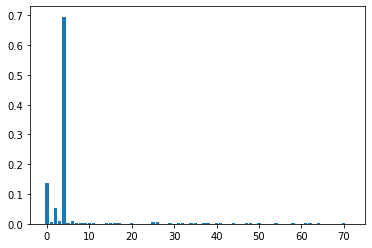

In [8]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, %s Score: %.5f' % (i,df.columns[i], v))
    
print(df.columns[np.argsort(-importance)])

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
cols = df.columns

In [10]:
df = df[["gap1", "gap2", "gap3", "positive"]]

In [11]:
inputs_to_model = tf.keras.layers.Input([df.shape[1]-1], name="myInput")   

layer1 = tf.keras.layers.Dense(units=256, activation="relu", name="myLayer1")(inputs_to_model)

layer2 = tf.keras.layers.Dense(units=100, activation="relu", name="yourLayer2")(layer1)


outputs_to_model = tf.keras.layers.Dense(units=1, activation="sigmoid", name="myPrediction")(layer2)

In [12]:
model = tf.keras.models.Model(inputs=[inputs_to_model], outputs=[outputs_to_model])

model.summary()  # Ask Keras to print the model summary

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
myInput (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
myLayer1 (Dense)             (None, 256)               1024      
_________________________________________________________________
yourLayer2 (Dense)           (None, 100)               25700     
_________________________________________________________________
myPrediction (Dense)         (None, 1)                 101       
Total params: 26,825
Trainable params: 26,825
Non-trainable params: 0
_________________________________________________________________


In [13]:
metrics = [
#       tf.keras.metrics.TruePositives(name='tp'),
#       tf.keras.metrics.FalsePositives(name='fp'),
#       tf.keras.metrics.TrueNegatives(name='tn'),
#       tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
#       tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [14]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=metrics)

In [15]:
train = df.sample(frac=0.8,random_state=816) #random state is a seed value
test = df.drop(train.index)

In [16]:
y_train = train["positive"]
x_train = train.iloc[:, :-1]

y_test = test["positive"]
x_test = test.iloc[:, :-1]


In [17]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [18]:
%tensorboard --logdir logs

In [ ]:
number_of_epochs = 30
model.fit(x_train, y_train, epochs=number_of_epochs, batch_size=16, 
          verbose=1, validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/30
947/947 [==============================] - 7s 6ms/step - loss: 0.4425 - accuracy: 0.8391 - precision: 0.9028 - recall: 0.7467 - auc: 0.9410 - val_loss: 0.1699 - val_accuracy: 0.9326 - val_precision: 0.9284 - val_recall: 0.9358 - val_auc: 0.9795
Epoch 2/30
947/947 [==============================] - 11s 12ms/step - loss: 0.1777 - accuracy: 0.9456 - precision: 0.9304 - recall: 0.9638 - auc: 0.9757 - val_loss: 0.2000 - val_accuracy: 0.9390 - val_precision: 0.8961 - val_recall: 0.9914 - val_auc: 0.9704
Epoch 3/30
947/947 [==============================] - 8s 8ms/step - loss: 0.1532 - accuracy: 0.9520 - precision: 0.9317 - recall: 0.9760 - auc: 0.9789 - val_loss: 0.1359 - val_accuracy: 0.9593 - val_precision: 0.9364 - val_recall: 0.9845 - val_auc: 0.9831
Epoch 4/30
947/947 [==============================] - 11s 12ms/step - loss: 0.1329 - accuracy: 0.9581 - precision: 0.9382 - recall: 0.9818 - auc: 0.9808 - val_loss: 0.1631 - val_accuracy: 0.9559 - val_precision: 0.9442 - val_recal